In [3]:
import ZebrafishHMM2023
import Makie
import CairoMakie

using Statistics: mean
using HiddenMarkovModels: logdensityof, baum_welch, transition_matrix, initial_distribution, viterbi
using Test: @test, @testset
using ZebrafishHMM2023: load_artr_wolf_2023, HMM_ARTR, normalize_transition_matrix, ATol

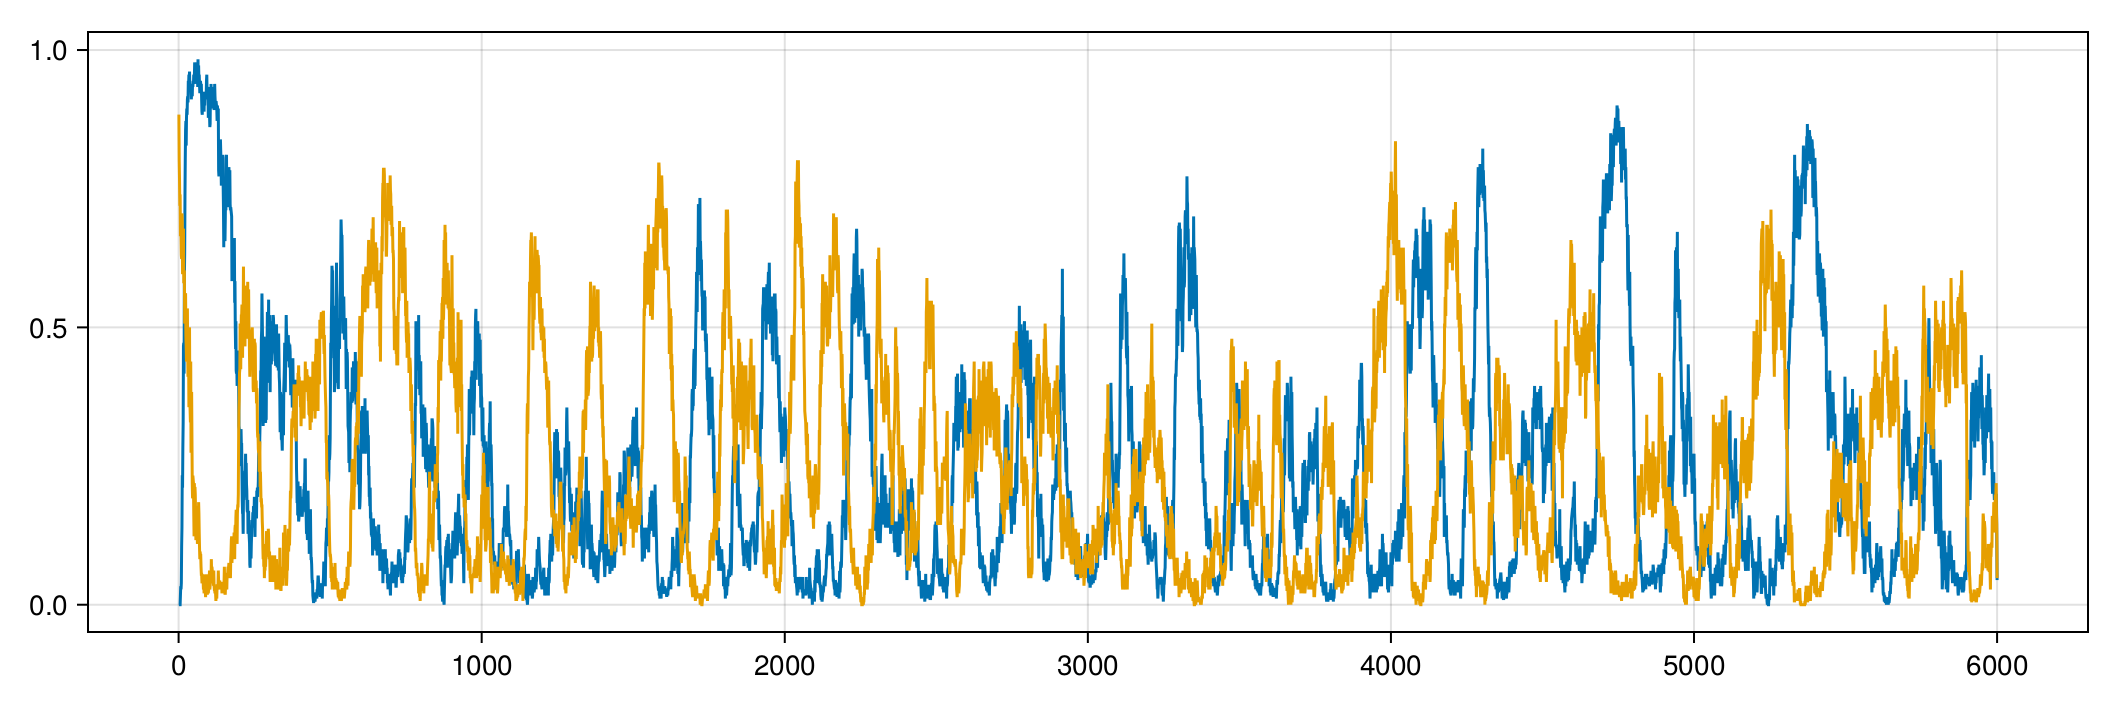

In [36]:
fig = Makie.Figure()
ax = Makie.Axis(fig[1,1], width=1000, height=300)
Makie.lines!(ax, vec(mean(ZebrafishHMM2023.load_artr_wolf_2023(; temperature=18, fish=12).right; dims=1)))
Makie.lines!(ax, vec(mean(ZebrafishHMM2023.load_artr_wolf_2023(; temperature=18, fish=12).left; dims=1)))
Makie.resize_to_layout!(fig)
fig

In [4]:
data = load_artr_wolf_2023(; temperature=18, fish=12)
trajs = collect(eachcol(vcat(data.left, data.right)))
hmm = HMM_ARTR([0.75 0.25; 0.25 0.75], randn(326, 2), 0.1)
(hmm, lL) = baum_welch(hmm, trajs; max_iterations = 500, check_loglikelihood_increasing = false, atol = ATol(1e-7));

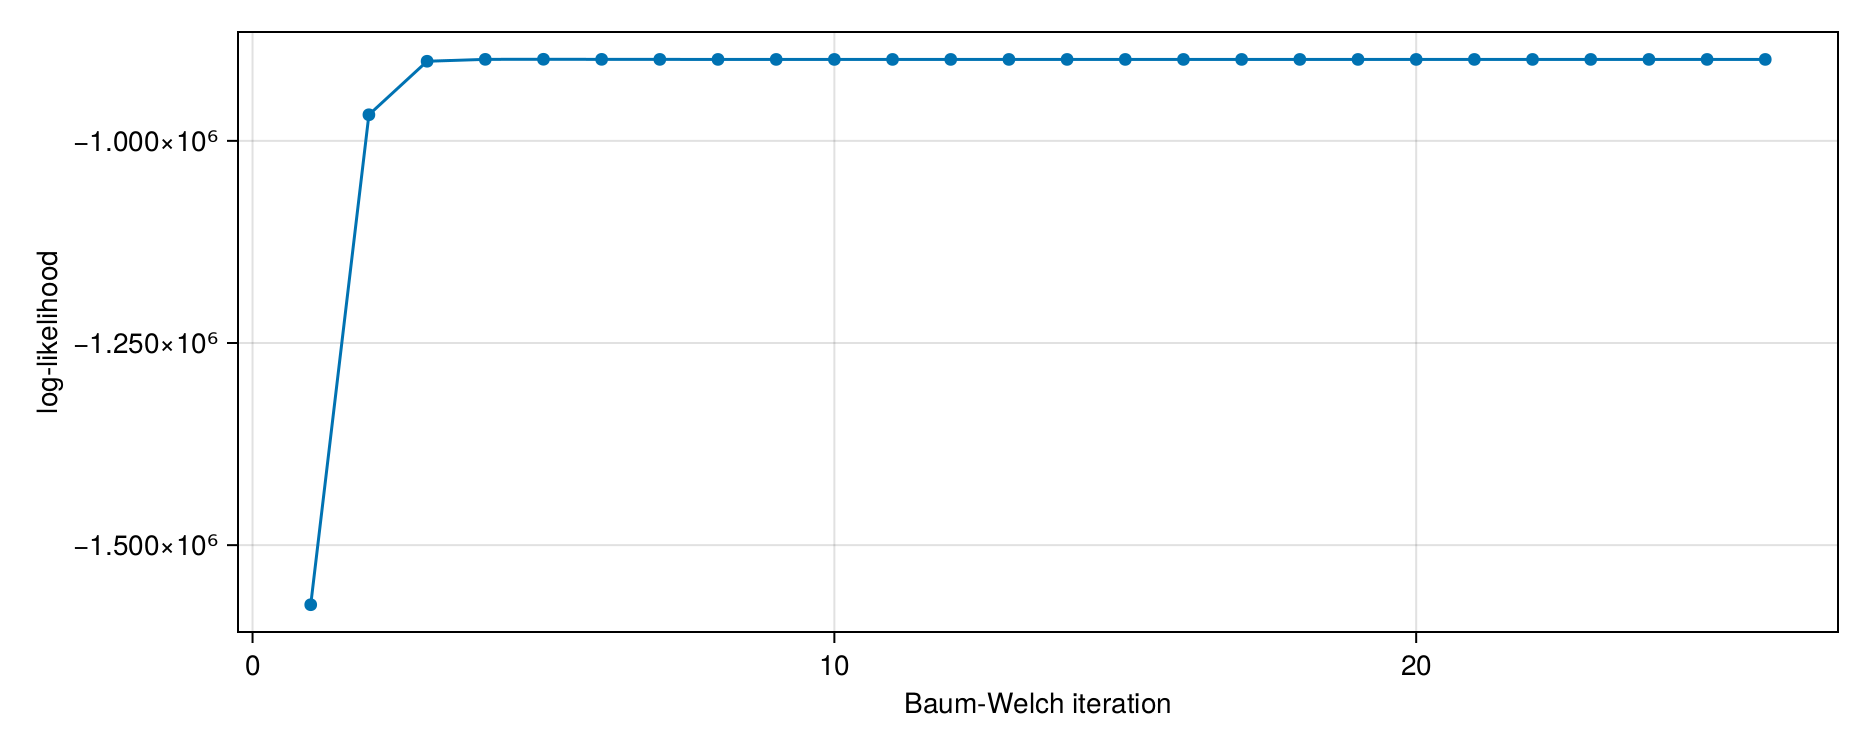

In [35]:
fig = Makie.Figure()
ax = Makie.Axis(fig[1,1], width=800, height=300, xlabel="Baum-Welch iteration", ylabel="log-likelihood")
Makie.scatterlines!(ax, lL)
Makie.resize_to_layout!(fig)
fig

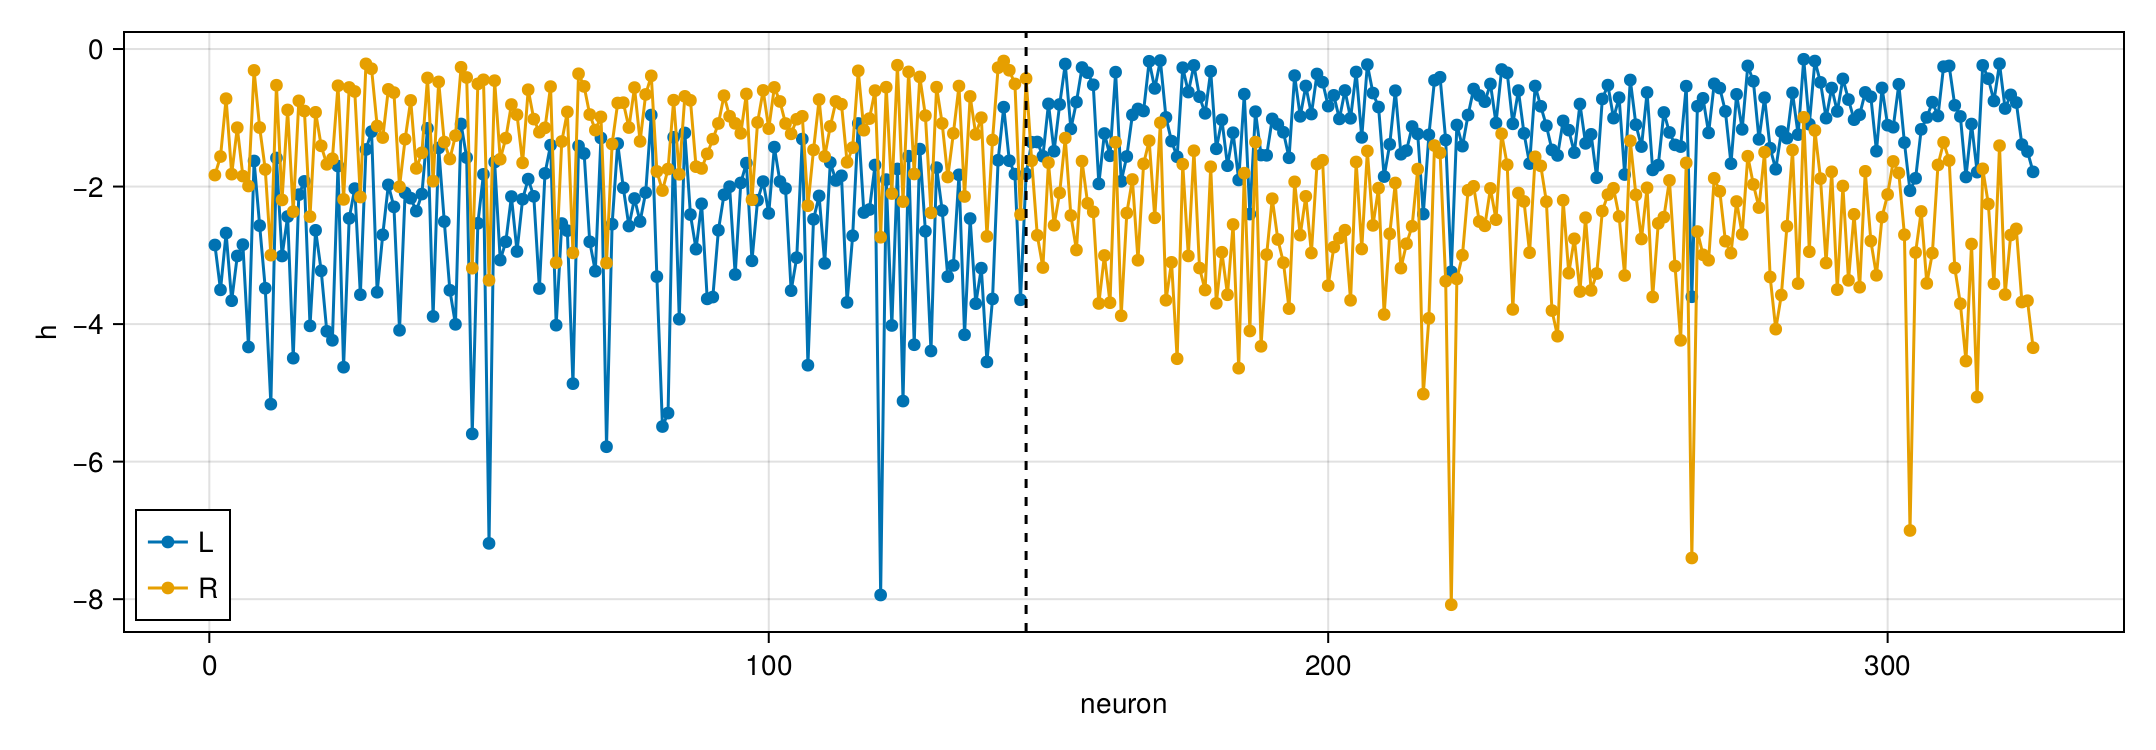

In [31]:
fig = Makie.Figure()
ax = Makie.Axis(fig[1,1], width=1000, height=300, xlabel="neuron", ylabel="h")
Makie.scatterlines!(ax, hmm.h[:,1], label="L")
Makie.scatterlines!(ax, hmm.h[:,2], label="R")
Makie.vlines!(ax, size(data.left, 1), color=:black, linestyle=:dash)
Makie.axislegend(ax, position=:lb)
Makie.resize_to_layout!(fig)
fig

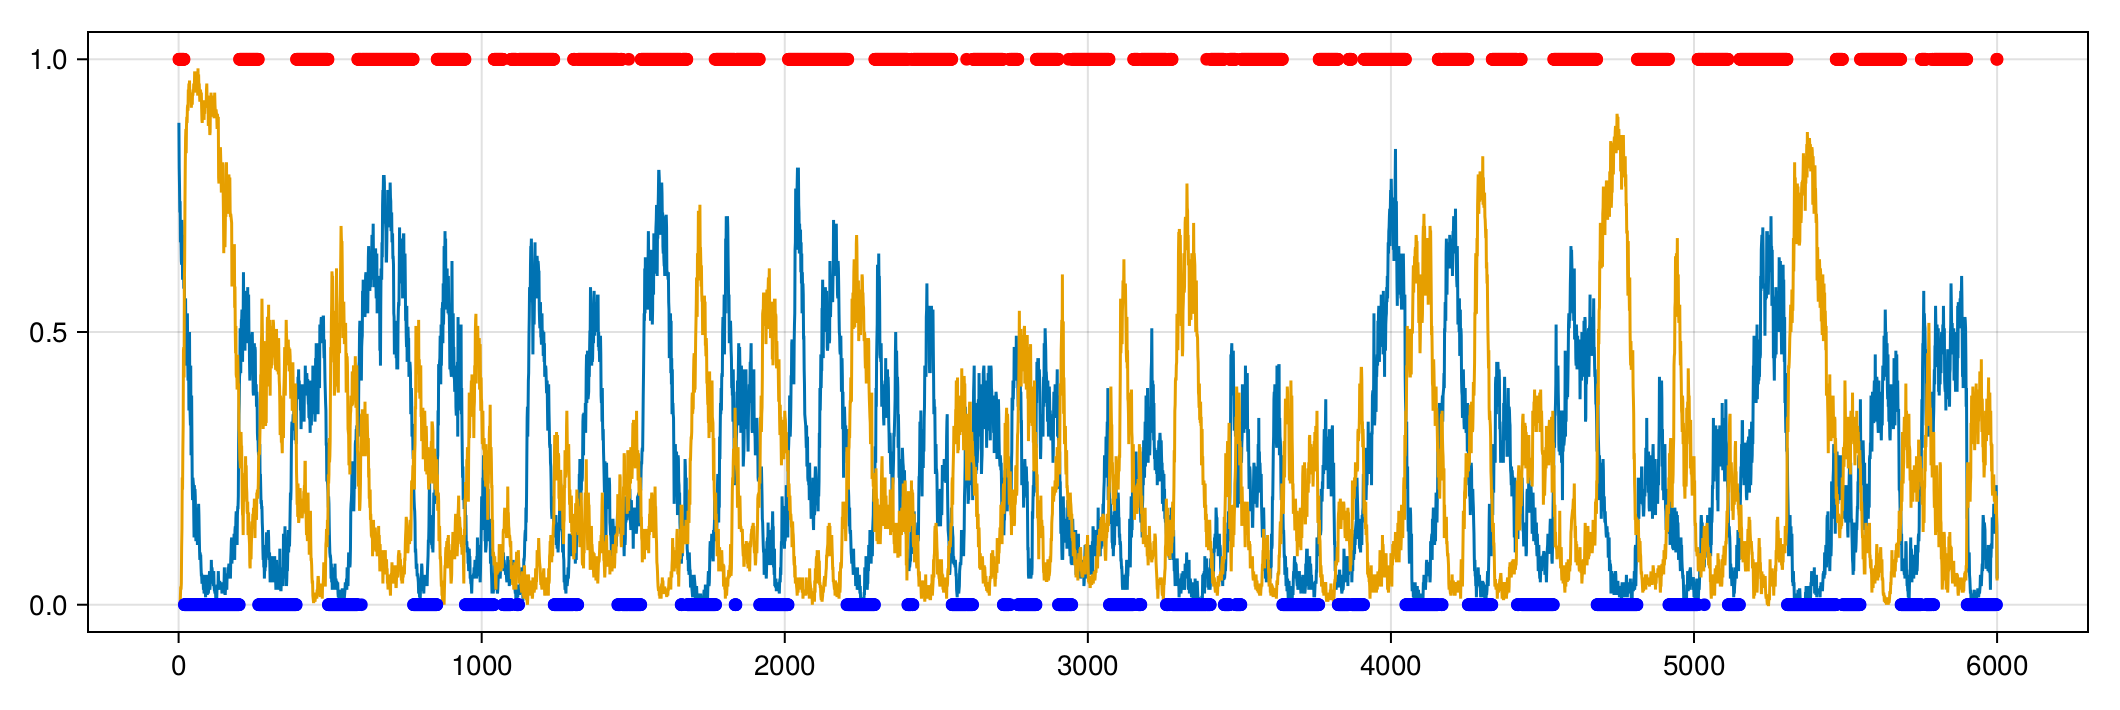

In [29]:
fig = Makie.Figure()
ax = Makie.Axis(fig[1,1], width=1000, height=300)
Makie.lines!(ax, vec(mean(data.left; dims=1)))
Makie.lines!(ax, vec(mean(data.right; dims=1)))
Makie.scatter!(ax, findall(viterbi(hmm, trajs) .== 1), zeros(count(viterbi(hmm, trajs) .== 1)), color=:blue)
Makie.scatter!(ax, findall(viterbi(hmm, trajs) .== 2), ones(count(viterbi(hmm, trajs) .== 2)), color=:red)
Makie.resize_to_layout!(fig)
fig